In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from datetime import timedelta
import numpy as np

pd.set_option('display.max_columns', None)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
colors = sns.color_palette('pastel')

In [2]:
df_click = pd.read_csv('C:/Users/mj985/section5/ecommerce_project/EDA/model_new_session_id.csv')
df_trans_new = pd.read_csv('C:/Users/mj985/section5/TeamProject2/csv/transaction_new.csv')
df_customer = pd.read_csv('C:/Users/mj985/section5/TeamProject2/csv/customer.csv')

In [3]:
df_trans_user = df_trans_new.merge(df_customer, on = 'customer_id', how = 'left')

In [4]:
df_click = df_click.rename(columns={'session_id': 'new_session_id'})
df_click['session_id'] = df_click['new_session_id'].apply(lambda x: x[:36])

In [5]:
# session_id 열을 기준으로 df와 df_trans_new를 병합
merged_df = pd.merge(df_click, df_trans_user, on='session_id', how='left')
merged_df['event_time'] = pd.to_datetime(merged_df['event_time'])
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21130155 entries, 0 to 21130154
Data columns (total 43 columns):
 #   Column                  Dtype              
---  ------                  -----              
 0   new_session_id          object             
 1   event_name              object             
 2   event_time              datetime64[ns, UTC]
 3   event_id                object             
 4   traffic_source          object             
 5   product_id_x            float64            
 6   quantity_x              float64            
 7   item_price_x            float64            
 8   payment_status_x        object             
 9   search_keywords         object             
 10  promo_code_x            object             
 11  promo_amount_x          float64            
 12  duration_time           object             
 13  session_id              object             
 14  created_at              object             
 15  customer_id             float64            
 16

In [6]:
merged_df['first_join_date'] = pd.to_datetime(merged_df['first_join_date'])

In [7]:
merged_df = merged_df[['new_session_id', 'event_name', 'product_id_x', 'event_time', 'traffic_source', 'payment_status_x', 'search_keywords', 'promo_code_x', 'promo_amount_x', 'customer_id', 'first_join_date']]

In [8]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21130155 entries, 0 to 21130154
Data columns (total 11 columns):
 #   Column            Dtype              
---  ------            -----              
 0   new_session_id    object             
 1   event_name        object             
 2   product_id_x      float64            
 3   event_time        datetime64[ns, UTC]
 4   traffic_source    object             
 5   payment_status_x  object             
 6   search_keywords   object             
 7   promo_code_x      object             
 8   promo_amount_x    float64            
 9   customer_id       float64            
 10  first_join_date   datetime64[ns]     
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(3), object(6)
memory usage: 1.7+ GB


In [9]:
time_df = merged_df[['customer_id', 'new_session_id', 'event_time', 'first_join_date', 'traffic_source']].drop_duplicates(subset='new_session_id', keep = 'last')

In [10]:
time_df['created_at'] = time_df['event_time'].dt.strftime('%Y-%m-%d')
time_df.head(5)

,customer_id,new_session_id,event_time,first_join_date,traffic_source,created_at
0,74433.0,00001f29-3ede-4445-95f0-0178934e32ba_1,2019-05-17 11:51:52.276396+00:00,2017-02-05,MOBILE,2019-05-17
2,74433.0,00001f29-3ede-4445-95f0-0178934e32ba_2,2019-05-17 19:55:12.276396+00:00,2017-02-05,MOBILE,2019-05-17
3,74433.0,00001f29-3ede-4445-95f0-0178934e32ba_3,2019-05-18 03:58:25.276396+00:00,2017-02-05,MOBILE,2019-05-18
4,74433.0,00001f29-3ede-4445-95f0-0178934e32ba_4,2019-05-18 12:02:44.276396+00:00,2017-02-05,MOBILE,2019-05-18
5,74433.0,00001f29-3ede-4445-95f0-0178934e32ba_5,2019-05-18 20:04:54.276396+00:00,2017-02-05,MOBILE,2019-05-18


In [12]:
time_df = time_df.groupby(['customer_id', 'created_at'])[['first_join_date','new_session_id']].first().reset_index()

In [13]:
time_df['created_at'] = pd.to_datetime(time_df['created_at'])

In [14]:
time_df['diff'] = time_df['created_at'] - time_df['first_join_date']
time_df['diff'].describe()

count                        4389880
mean     634 days 10:27:55.405432472
std      486 days 19:40:19.969058768
min                -1 days +00:00:00
25%                229 days 00:00:00
50%                525 days 00:00:00
75%                956 days 00:00:00
max               2217 days 00:00:00
Name: diff, dtype: object

In [15]:
time_df

,customer_id,created_at,first_join_date,new_session_id,diff
0,3.0,2018-08-25,2018-08-25,f03b6825-1e6e-4916-bf71-f94ecbcbaee5_7952132,0 days
1,3.0,2018-09-18,2018-08-25,36673b2f-940a-42b5-994d-1cce4796b55f_1792149,24 days
2,3.0,2018-09-19,2018-08-25,36673b2f-940a-42b5-994d-1cce4796b55f_1792150,25 days
3,3.0,2018-09-20,2018-08-25,36673b2f-940a-42b5-994d-1cce4796b55f_1792151,26 days
4,3.0,2018-09-22,2018-08-25,36673b2f-940a-42b5-994d-1cce4796b55f_1792152,28 days
...,...,...,...,...,...
4389875,99998.0,2022-01-09,2018-07-01,4fc4d81b-4b29-4aef-bd1f-263c373950d1_2625126,1288 days
4389876,99998.0,2022-01-11,2018-07-01,4fc4d81b-4b29-4aef-bd1f-263c373950d1_2625127,1290 days
4389877,99998.0,2022-01-12,2018-07-01,4fc4d81b-4b29-4aef-bd1f-263c373950d1_2625128,1291 days
4389878,99998.0,2022-01-25,2018-07-01,4fc4d81b-4b29-4aef-bd1f-263c373950d1_2625129,1304 days


In [16]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4389880 entries, 0 to 4389879
Data columns (total 5 columns):
 #   Column           Dtype          
---  ------           -----          
 0   customer_id      float64        
 1   created_at       datetime64[ns] 
 2   first_join_date  datetime64[ns] 
 3   new_session_id   object         
 4   diff             timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), object(1), timedelta64[ns](1)
memory usage: 167.5+ MB


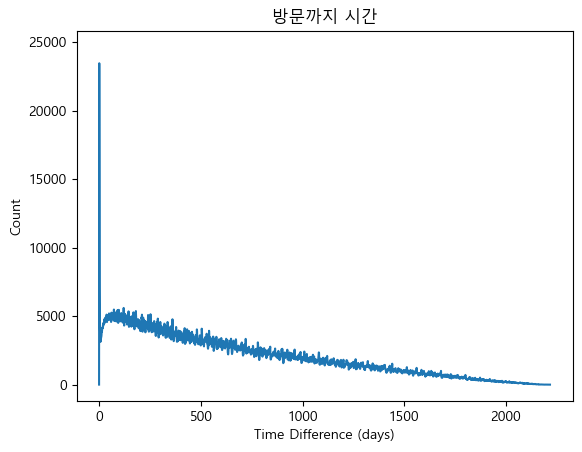

In [17]:
# 데이터프레임에서 diff칼럼을 이용해 시간차이에 따른 행의 수를 구합니다.
count_df = time_df.groupby(pd.Grouper(key='diff', freq='D')).size().reset_index(name='counts')

# diff가 1 day인 행을 제외합니다.
count_df = count_df[count_df['diff'] != pd.Timedelta(days=1)]

# counts 칼럼에서 최대값을 구합니다.
max_count = count_df['counts'].max()

# 그래프를 그립니다.
plt.title("방문까지 시간")
plt.plot(count_df['diff'].dt.days, count_df['counts'])
plt.xlabel('Time Difference (days)')
plt.ylabel('Count')
plt.ylim(top=max_count*1.1)
plt.show()

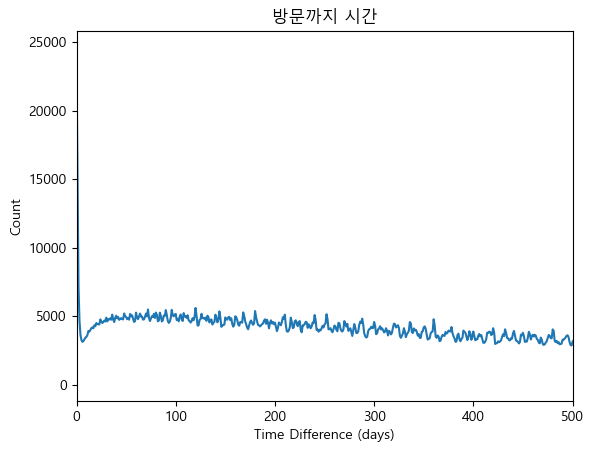

In [18]:
# 데이터프레임에서 diff칼럼을 이용해 시간차이에 따른 행의 수를 구합니다.
count_df = time_df.groupby(pd.Grouper(key='diff', freq='D')).size().reset_index(name='counts')

# diff가 1 day인 행을 제외합니다.
count_df = count_df[count_df['diff'] != pd.Timedelta(days=1)]

# counts 칼럼에서 최대값을 구합니다.
max_count = count_df['counts'].max()

# 그래프를 그립니다.
plt.title("방문까지 시간")
plt.plot(count_df['diff'].dt.days, count_df['counts'])
plt.xlabel('Time Difference (days)')
plt.ylabel('Count')
plt.ylim(top=max_count*1.1)

# x축 범위를 0부터 500까지로 설정합니다.
plt.xlim(left=0, right=500)
plt.show()


In [19]:
# 함수 정의
def calculate_time_diff(group):
    # 첫번째 행은 created_at과 first_join_date의 시간 차이를 구합니다.
    group['diff'] = group['created_at'] - group['first_join_date']
    
    # 두번째 행부터 이전 행과의 created_at 칼럼의 시간차이를 구합니다.
    group['diff'] = group['diff'].diff().fillna(pd.Timedelta(seconds=0))
    
    return group

# customer_id로 그룹화한 후 apply 함수를 사용하여 calculate_time_diff 함수를 적용합니다.
check_df = time_df.groupby('customer_id').apply(calculate_time_diff)

In [20]:
check_df.tail(20)

customer_id created_at first_join_date   
customer_id                                                   
99998.0     4389860      99998.0 2021-12-20      2018-07-01  \
            4389861      99998.0 2021-12-21      2018-07-01   
            4389862      99998.0 2021-12-22      2018-07-01   
            4389863      99998.0 2021-12-24      2018-07-01   
            4389864      99998.0 2021-12-25      2018-07-01   
            4389865      99998.0 2021-12-27      2018-07-01   
            4389866      99998.0 2021-12-28      2018-07-01   
            4389867      99998.0 2021-12-29      2018-07-01   
            4389868      99998.0 2021-12-31      2018-07-01   
            4389869      99998.0 2022-01-01      2018-07-01   
            4389870      99998.0 2022-01-02      2018-07-01   
            4389871      99998.0 2022-01-04      2018-07-01   
            4389872      99998.0 2022-01-05      2018-07-01   
            4389873      99998.0 2022-01-07      2018-07-01   
            4389874      99998.0 2022-01-08      2018-07-01   
            4389875      99998.0 2022-01-09      2018-07-01   
            4389876      99998.0 2022-01-11      2018-07-01   
            4389877      99998.0 2022-01-12      2018-07-01   
            4389878      99998.0 2022-01-25      2018-07-01   
99999.0     4389879      99999.0 2016-10-12      2016-10-12   

                                                   new_session_id     diff  
customer_id                                                                 
99998.0     4389860  4fc4d81b-4b29-4aef-bd1f-263c373950d1_2625111 151 days  
            4389861  4fc4d81b-4b29-4aef-bd1f-263c373950d1_2625112   1 days  
            4389862  4fc4d81b-4b29-4aef-bd1f-263c373950d1_2625113   1 days  
            4389863  4fc4d81b-4b29-4aef-bd1f-263c373950d1_2625114   2 days  
            4389864  4fc4d81b-4b29-4aef-bd1f-263c373950d1_2625115   1 days  
            4389865  4fc4d81b-4b29-4aef-bd1f-263c373950d1_2625116   2 days  
            4389866  4fc4d81b-4b29-4aef-bd1f-263c373950d1_2625117   1 days  
            4389867  4fc4d81b-4b29-4aef-bd1f-263c373950d1_2625118   1 days  
            4389868  4fc4d81b-4b29-4aef-bd1f-263c373950d1_2625119   2 days  
            4389869  4fc4d81b-4b29-4aef-bd1f-263c373950d1_2625120   1 days  
            4389870  4fc4d81b-4b29-4aef-bd1f-263c373950d1_2625121   1 days  
            4389871  4fc4d81b-4b29-4aef-bd1f-263c373950d1_2625122   2 days  
            4389872  4fc4d81b-4b29-4aef-bd1f-263c373950d1_2625123   1 days  
            4389873  4fc4d81b-4b29-4aef-bd1f-263c373950d1_2625124   2 days  
            4389874  4fc4d81b-4b29-4aef-bd1f-263c373950d1_2625125   1 days  
            4389875  4fc4d81b-4b29-4aef-bd1f-263c373950d1_2625126   1 days  
            4389876  4fc4d81b-4b29-4aef-bd1f-263c373950d1_2625127   2 days  
            4389877  4fc4d81b-4b29-4aef-bd1f-263c373950d1_2625128   1 days  
            4389878  4fc4d81b-4b29-4aef-bd1f-263c373950d1_2625129  13 days  
99999.0     4389879   0d388e45-49fc-44e1-9211-1a42db40f7ec_435770   0 days

In [21]:
check_df = check_df.reset_index(level=0, drop=True)

In [22]:
check_df.head(5)

,customer_id,created_at,first_join_date,new_session_id,diff
0,3.0,2018-08-25,2018-08-25,f03b6825-1e6e-4916-bf71-f94ecbcbaee5_7952132,0 days
1,3.0,2018-09-18,2018-08-25,36673b2f-940a-42b5-994d-1cce4796b55f_1792149,24 days
2,3.0,2018-09-19,2018-08-25,36673b2f-940a-42b5-994d-1cce4796b55f_1792150,1 days
3,3.0,2018-09-20,2018-08-25,36673b2f-940a-42b5-994d-1cce4796b55f_1792151,1 days
4,3.0,2018-09-22,2018-08-25,36673b2f-940a-42b5-994d-1cce4796b55f_1792152,2 days


In [23]:
first_rows = check_df.groupby('customer_id').first()

In [24]:
first_rows['diff'].describe()

count              50704
mean     0 days 00:00:00
std      0 days 00:00:00
min      0 days 00:00:00
25%      0 days 00:00:00
50%      0 days 00:00:00
75%      0 days 00:00:00
max      0 days 00:00:00
Name: diff, dtype: object

In [25]:
time_df.shape

(4389880, 5)

In [26]:
# customer_id별 첫 번째 행 추출
first_rows = check_df.groupby('customer_id').nth(0)

# 첫 번째 행 드롭
check_df = check_df.drop(first_rows.index)

In [27]:
check_df.head(5)

,customer_id,created_at,first_join_date,new_session_id,diff
1,3.0,2018-09-18,2018-08-25,36673b2f-940a-42b5-994d-1cce4796b55f_1792149,24 days
2,3.0,2018-09-19,2018-08-25,36673b2f-940a-42b5-994d-1cce4796b55f_1792150,1 days
3,3.0,2018-09-20,2018-08-25,36673b2f-940a-42b5-994d-1cce4796b55f_1792151,1 days
4,3.0,2018-09-22,2018-08-25,36673b2f-940a-42b5-994d-1cce4796b55f_1792152,2 days
5,3.0,2018-10-05,2018-08-25,93e1d3c4-bed1-4ef4-b79f-e24a79e905b7_4883279,13 days


In [28]:
first_rows['diff'] = first_rows['created_at'] - first_rows['first_join_date']

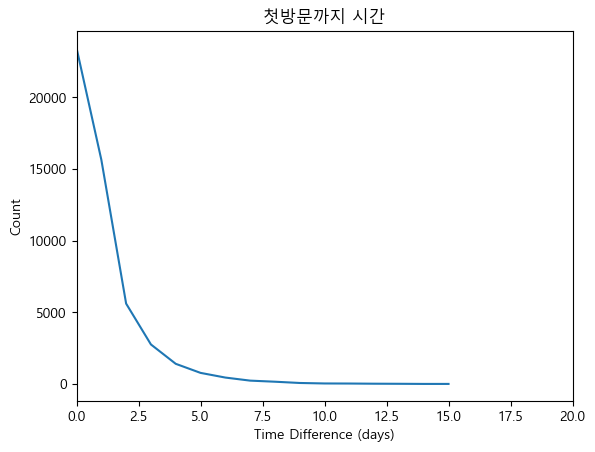

In [29]:
# 데이터프레임에서 diff칼럼을 이용해 시간차이에 따른 행의 수를 구합니다.
count_df = first_rows.groupby(pd.Grouper(key='diff', freq='D')).size().reset_index(name='counts')

# diff가 1 day인 행을 제외합니다.
count_df = count_df[count_df['diff'] != pd.Timedelta(days=-1)]

# counts 칼럼에서 최대값을 구합니다.
max_count = count_df['counts'].max()

# 그래프를 그립니다.
plt.title("첫방문까지 시간")
plt.plot(count_df['diff'].dt.days, count_df['counts'])
plt.xlabel('Time Difference (days)')
plt.ylabel('Count')

# x축 범위를 0부터 500까지로 설정합니다.
plt.xlim(left=0, right=20)
plt.show()


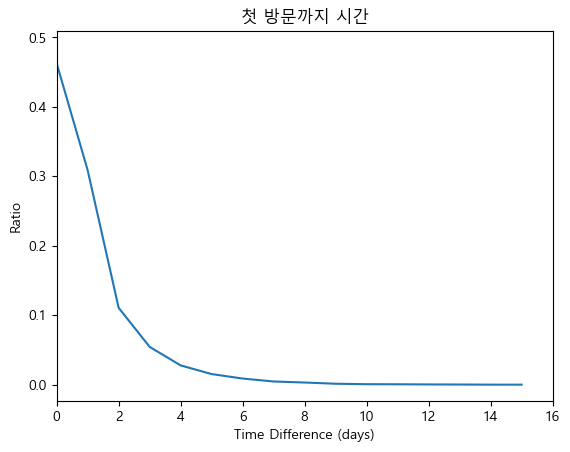

In [31]:
# 데이터프레임에서 diff칼럼을 이용해 시간차이에 따른 행의 수를 구합니다.
count_df = first_rows.groupby(pd.Grouper(key='diff', freq='D')).size().reset_index(name='counts')


# 전체 개수로 나누어 비율을 구합니다.
total_count = count_df['counts'].sum()
count_df['ratio'] = count_df['counts'] / total_count

# 최대값을 구합니다.
max_count = count_df['counts'].max()
max_ratio = count_df['ratio'].max()

# 그래프를 그립니다.
plt.title("첫 방문까지 시간")
plt.plot(count_df['diff'].dt.days, count_df['ratio'])
plt.xlabel('Time Difference (days)')
plt.ylabel('Ratio')
plt.ylim(top=max_ratio*1.1)

# x축 범위를 0부터 500까지로 설정합니다.
plt.xlim(left=0, right=16)
plt.show()

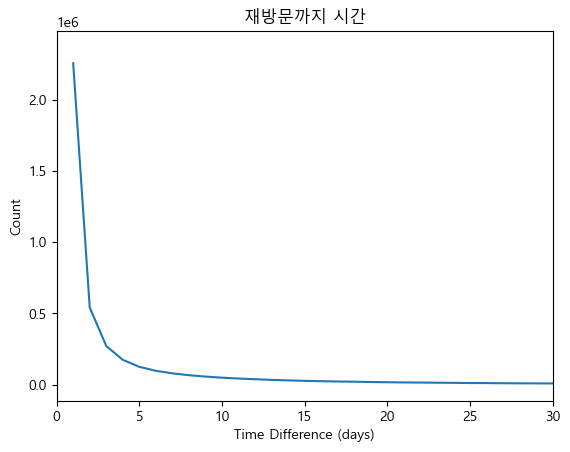

In [32]:
# 데이터프레임에서 diff칼럼을 이용해 시간차이에 따른 행의 수를 구합니다.
count_df = check_df.groupby(pd.Grouper(key='diff', freq='D')).size().reset_index(name='counts')

# counts 칼럼에서 최대값을 구합니다.
max_count = count_df['counts'].max()

# 그래프를 그립니다.
plt.title("재방문까지 시간")
plt.plot(count_df['diff'].dt.days, count_df['counts'])
plt.xlabel('Time Difference (days)')
plt.ylabel('Count')
plt.ylim(top=max_count*1.1)

# x축 범위를 0부터 500까지로 설정합니다.
plt.xlim(left=0, right=30)
plt.show()


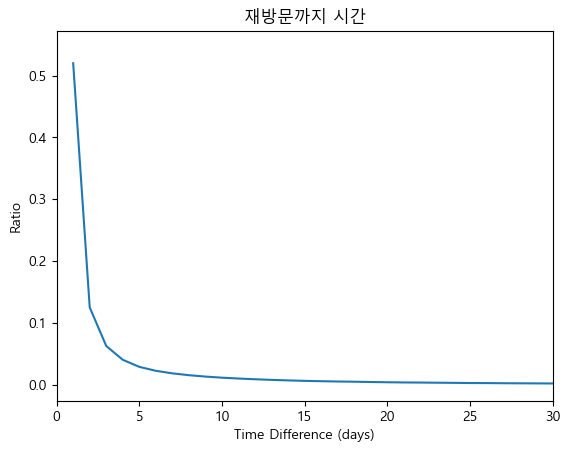

In [33]:
# 데이터프레임에서 diff칼럼을 이용해 시간차이에 따른 행의 수를 구합니다.
count_df = check_df.groupby(pd.Grouper(key='diff', freq='D')).size().reset_index(name='counts')


# 전체 개수로 나누어 비율을 구합니다.
total_count = count_df['counts'].sum()
count_df['ratio'] = count_df['counts'] / total_count

# 최대값을 구합니다.
max_count = count_df['counts'].max()
max_ratio = count_df['ratio'].max()

# 그래프를 그립니다.
plt.title("재방문까지 시간")
plt.plot(count_df['diff'].dt.days, count_df['ratio'])
plt.xlabel('Time Difference (days)')
plt.ylabel('Ratio')
plt.ylim(top=max_ratio*1.1)

# x축 범위를 0부터 500까지로 설정합니다.
plt.xlim(left=0, right=30)
plt.show()

In [34]:
check_df.head(5)

,customer_id,created_at,first_join_date,new_session_id,diff
1,3.0,2018-09-18,2018-08-25,36673b2f-940a-42b5-994d-1cce4796b55f_1792149,24 days
2,3.0,2018-09-19,2018-08-25,36673b2f-940a-42b5-994d-1cce4796b55f_1792150,1 days
3,3.0,2018-09-20,2018-08-25,36673b2f-940a-42b5-994d-1cce4796b55f_1792151,1 days
4,3.0,2018-09-22,2018-08-25,36673b2f-940a-42b5-994d-1cce4796b55f_1792152,2 days
5,3.0,2018-10-05,2018-08-25,93e1d3c4-bed1-4ef4-b79f-e24a79e905b7_4883279,13 days


In [48]:
check_df['diff'].describe()

count                       4339176
mean      7 days 22:58:27.291522630
std      27 days 12:50:28.448598663
min                 1 days 00:00:00
25%                 1 days 00:00:00
50%                 1 days 00:00:00
75%                 5 days 00:00:00
max              1080 days 00:00:00
Name: diff, dtype: object

In [37]:
# check_df에서 diff칼럼이 15일 이상인 행 추출
mask = check_df['diff'] > pd.Timedelta(days=15)
# target 열 생성
check_df['target'] = np.where(mask, 1, 0)

In [ ]:
check_df['target'].value_counts()

In [44]:
merged_df['event_name'].value_counts()

event_name
ADD_TO_CART    5004008
CLICK          3712985
HOMEPAGE       3650271
SCROLL         2472261
ITEM_DETAIL    1947749
SEARCH         1743646
BOOKING        1254578
PROMO_PAGE      863524
ADD_PROMO       481133
Name: count, dtype: int64

In [52]:
merged_df.head(5)

,new_session_id,event_name,product_id_x,event_time,traffic_source,payment_status_x,search_keywords,promo_code_x,promo_amount_x,customer_id,first_join_date,ADD_TO_CART,SEARCH,ADD_PROMO,ITEM_DETAIL,BOOKING
0,00001f29-3ede-4445-95f0-0178934e32ba_1,HOMEPAGE,NaN,2019-05-17 11:51:52.276396+00:00,MOBILE,NaN,NaN,NaN,NaN,74433.0,2017-02-05,NaN,NaN,NaN,NaN,NaN
1,00001f29-3ede-4445-95f0-0178934e32ba_2,ADD_TO_CART,33855.0,2019-05-17 19:54:53.276396+00:00,MOBILE,NaN,NaN,NaN,NaN,74433.0,2017-02-05,NaN,NaN,NaN,NaN,NaN
2,00001f29-3ede-4445-95f0-0178934e32ba_2,HOMEPAGE,NaN,2019-05-17 19:55:12.276396+00:00,MOBILE,NaN,NaN,NaN,NaN,74433.0,2017-02-05,NaN,NaN,NaN,NaN,NaN
3,00001f29-3ede-4445-95f0-0178934e32ba_3,CLICK,NaN,2019-05-18 03:58:25.276396+00:00,MOBILE,NaN,NaN,NaN,NaN,74433.0,2017-02-05,NaN,NaN,NaN,NaN,NaN
4,00001f29-3ede-4445-95f0-0178934e32ba_4,CLICK,NaN,2019-05-18 12:02:44.276396+00:00,MOBILE,NaN,NaN,NaN,NaN,74433.0,2017-02-05,NaN,NaN,NaN,NaN,NaN


In [57]:
merged_df = merged_df.merge(merged_df[merged_df['event_name'] == 'ADD_TO_CART'].groupby('new_session_id')['event_time'].count(), on = 'new_session_id', how = 'left')


In [61]:
merged_df['event_time_y'] = merged_df['event_time_y'].fillna(0)

In [63]:
merged_df = merged_df.rename(columns={'event_time_y': 'ADD_TO_CART_COUNT'})

In [68]:
# merged_df = merged_df.merge(merged_df[merged_df['event_name'] == 'SEARCH'].groupby('new_session_id')['event_time_x'].count(), on = 'new_session_id', how = 'left')
# merged_df.head(5)

KeyError: 'Column not found: event_time_x'

In [49]:
# merged_df.to_csv('check_num_events.csv')